<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> Summer Program FGV/EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# Decision Trees, Bagging, and Boost

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()

X_data = digits.data
Y_classes = digits.target

In [2]:
###########
# K-fold CV
###########

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_classes, train_size=0.7, random_state=3)
test_size = Y_test.shape[0]

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Decision Tree Classifier

In [3]:
###########
# Decision Tree Classifier
###########

dtc = DecisionTreeClassifier(max_depth=15)
dtc.fit(X_train, Y_train.ravel())

# Predicting  test data
dtc_pred = dtc.predict(X_test)

# Computing error
dtc_error = np.sum([int(dtc_pred[i] != Y_test[i]) for i in range(0,test_size)])

print("----------Decision Tree Classfication----------")
print(dtc_error, "misclassified data out of", test_size, "(",100*(dtc_error/test_size),"%)")

----------Decision Tree Classfication----------
71 misclassified data out of 540 ( 13.148148148148147 %)


## Bagging

In [4]:
###########
# Bagging Trees
###########

bagt = BaggingClassifier(DecisionTreeClassifier(max_depth=15), n_estimators=10)
bagt.fit(X_train,Y_train.ravel())

# Predicting test data
bagt_pred = bagt.predict(X_test)

# Computing error
bagt_error = np.sum([int(bagt_pred[i] != Y_test[i]) for i in range(0,test_size)])

print("----------Bagging Classfication----------")
print(bagt_error, "misclassified data out of", test_size, "(",100*(bagt_error/test_size),"%)")

----------Bagging Classfication----------
41 misclassified data out of 540 ( 7.592592592592593 %)


## Boosting 

In [23]:
###########
# AdaBoost
###########

adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10), n_estimators=15)
#adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=30,learning_rate=0.05,algorithm="SAMME")
adab.fit(X_train,Y_train.ravel())

# Predicting
adab_pred = adab.predict(X_test)

# Computing error
adab_error = np.sum([int(adab_pred[i] != Y_test[i]) for i in range(0,test_size)])

print("----------Bagging Classfication----------")
print(adab_error, "misclassified data out of", test_size, "(",100*(adab_error/test_size),"%)")


----------Bagging Classfication----------
15 misclassified data out of 540 ( 2.7777777777777777 %)


## Random Forest

In [21]:
###########
# Random Forest
###########

rdf = RandomForestClassifier(max_depth=10, n_estimators=15,bootstrap=True)
rdf.fit(X_train,Y_train.ravel())

# Predicting
rdf_pred = rdf.predict(X_test)

# Computing error
rdf_error = np.sum([int(rdf_pred[i] != Y_test[i]) for i in range(0,test_size)])

print("----------Bagging Classfication----------")
print(rdf_error, "misclassified data out of", test_size, "(",100*(rdf_error/test_size),"%)")

----------Bagging Classfication----------
20 misclassified data out of 540 ( 3.7037037037037033 %)


<IPython.core.display.Javascript object>


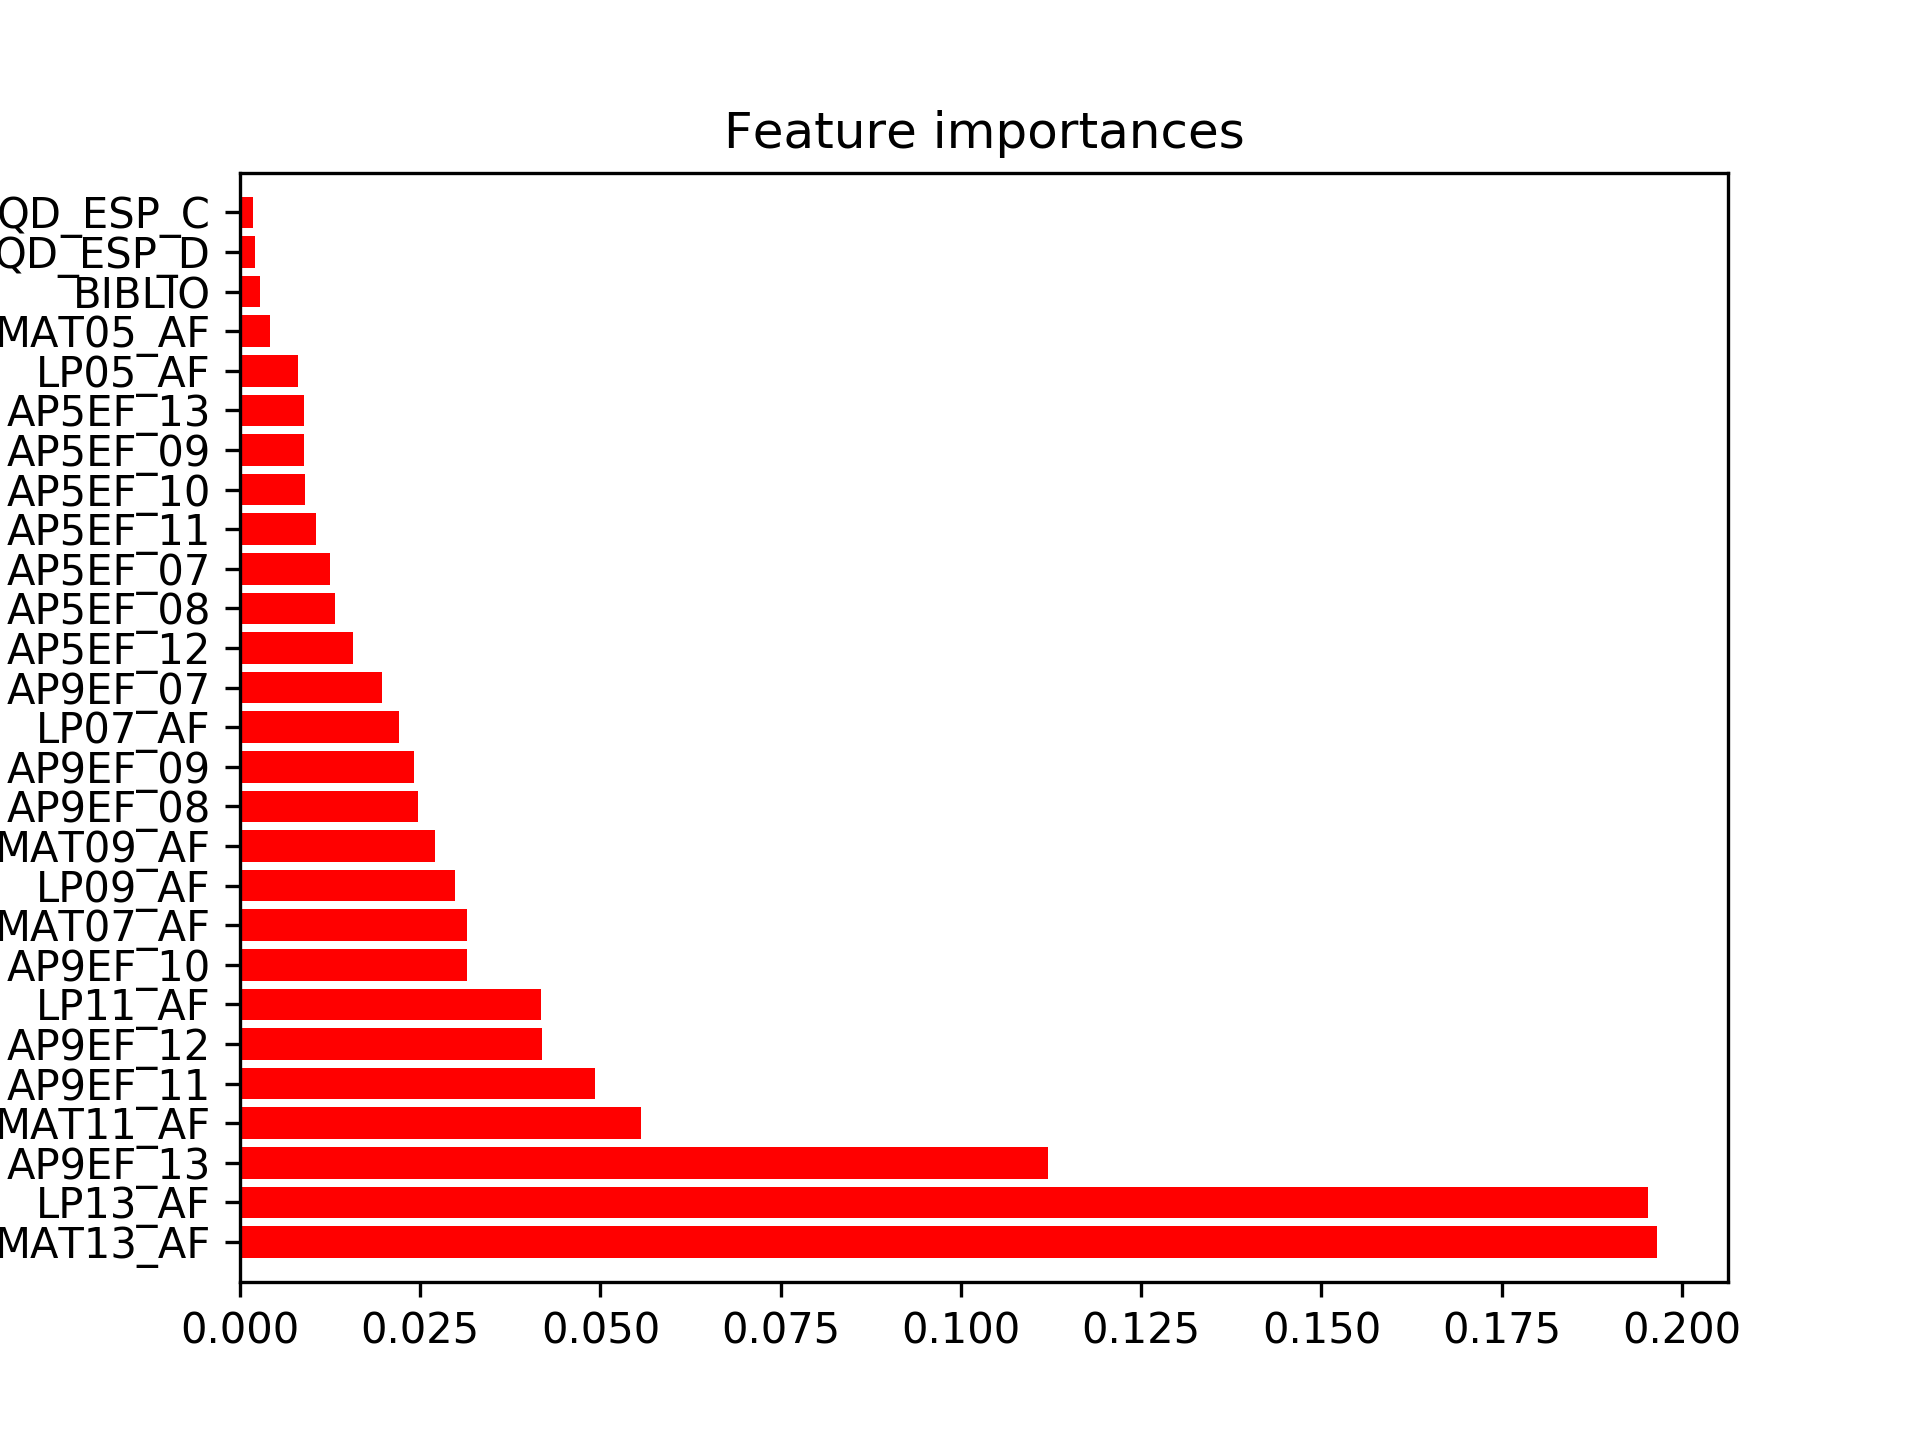

(-1, 27)

In [12]:
attribute_relevance = rdf.feature_importances_
indices = np.argsort(attribute_relevance)[::-1]
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), attribute_relevance[indices],
       color="r", align="center")
plt.yticks(range(X_train.shape[1]), df.columns[1:-1][indices])
plt.ylim([-1, X_train.shape[1]])